In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [203]:
df = pd.read_csv("C:\\Users\\alokk\\1-Data Science Srk Sir\\27-Capstop Project\\Admission Predicisson\\admission_predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Exploring tha dataset

In [160]:
df.shape

(500, 9)

In [161]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Explotory Data Analysis(EDA)

In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


<Axes: >

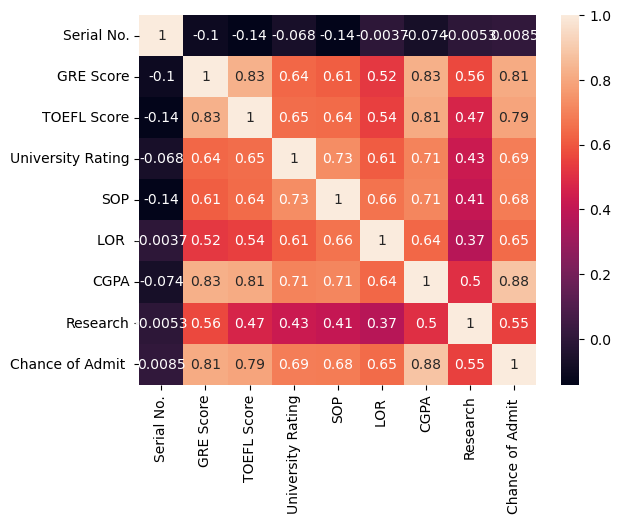

In [164]:
sns.heatmap(df.corr(),annot=True)

In [204]:
df.rename(columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL","LOR ":"LOR","Chance of Admit ":"Chance of Admit"}, inplace=True)


In [205]:
df.columns

Index(['Serial No.', 'GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [167]:
# Returns different datatypes for each columns (float, int, string, bool, etc)
df.dtypes

Serial No.             int64
GRE                    int64
TOEFL                  int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [168]:
# Returns true for a column having null values, else false
df.isnull().any()

Serial No.           False
GRE                  False
TOEFL                False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [169]:
# Describing the features GRE, TOEFL, SOP, LOR, CGPA, Research
columns = ["GRE", "TOEFL", "SOP", "LOR", "CGPA", "Research"]
for i in columns:
    print(f"<======={i}======>")
    print(df[i].describe())


<=======GRE======>
count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE, dtype: float64
<=======TOEFL======>
count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL, dtype: float64
<=======SOP======>
count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64
<=======LOR======>
count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: LOR, dtype: float64
<=======CGPA======>
count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name

### Data Visualization

 Continous Data

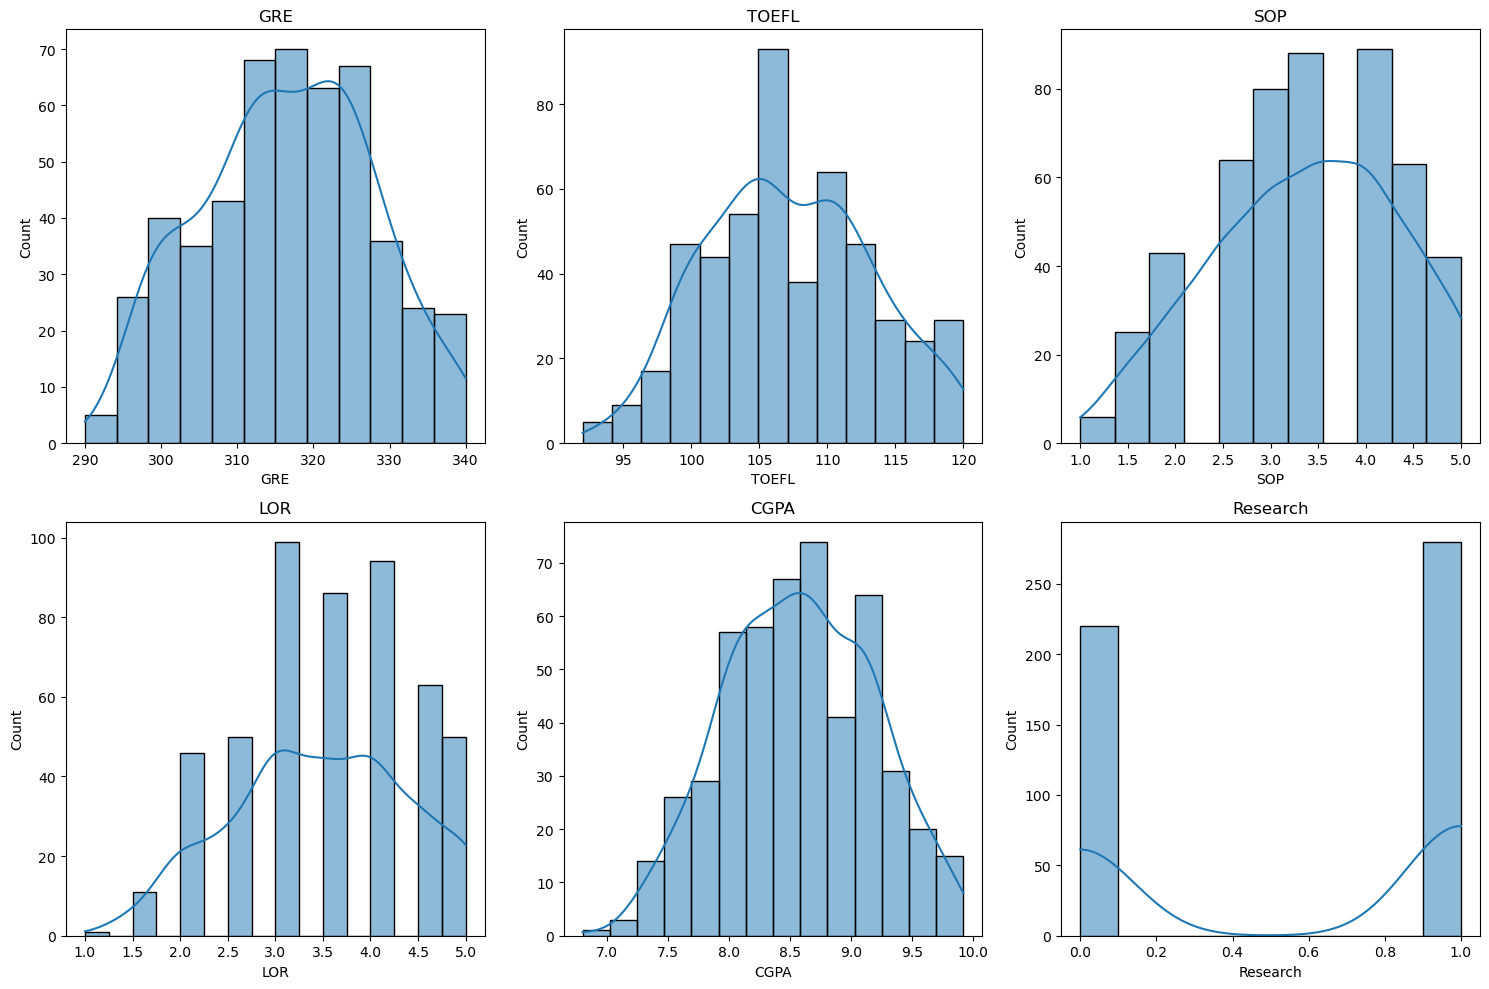

In [44]:
# Visualizing the features GRE, TOEFL, SOP, LOR, CGPA, Research
columns = ["GRE", "TOEFL", "SOP", "LOR", "CGPA", "Research"]

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through columns and create separate distribution plots
for i, col in enumerate(columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

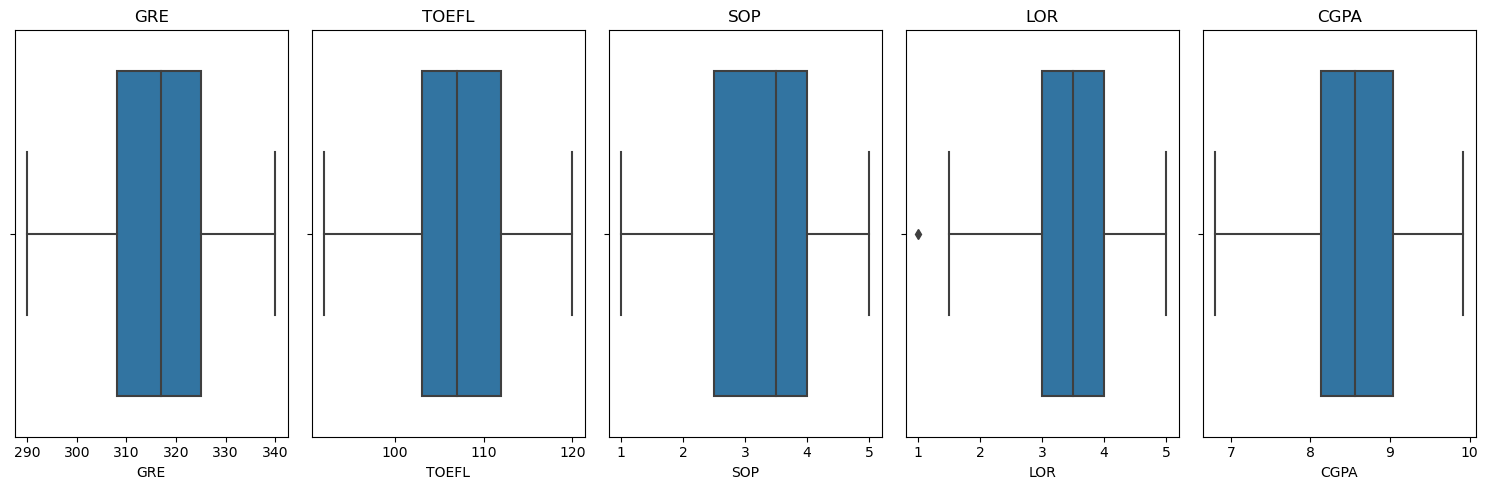

In [14]:
# Visualizing the outlier GRE, TOEFL, SOP, LOR, CGPA, Research
columns = ["GRE", "TOEFL", "SOP", "LOR", "CGPA"]

# Setting up subplots
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

# Loop through columns and create separate box plots
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

### Data Cleaning

In [206]:
# Remove irelavent columns
df.drop("Serial No.",axis="columns",inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Create X and y

In [207]:
X = df.iloc[:, 0:-1]  
y = df.iloc[:, -1]   


# Train Test Split

In [208]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# This dataset is used in a regression model -:

# Feature Scaling / Model Training

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model Training

In [175]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

# Prediction

In [176]:
ypred1 = lr.predict(X_test)
ypred2 = svm.predict(X_test)
ypred3 = rf.predict(X_test)
ypred4 = gr.predict(X_test)


# Evaluation

In [180]:
score1 = metrics.r2_score(y_test, ypred1)
score2 = metrics.r2_score(y_test, ypred2)
score3 = metrics.r2_score(y_test, ypred3)
score4 = metrics.r2_score(y_test, ypred4)


In [183]:
final_data = pd.DataFrame({"Models":["LR","SVR","RF","GR"],
                          "R2_Score":[score1,score2,score3,score3]})

In [184]:
final_data

,Models,R2_Score
0,LR,0.818843
1,SVR,0.758938
2,RF,0.789657
3,GR,0.789657


# PLot this data 

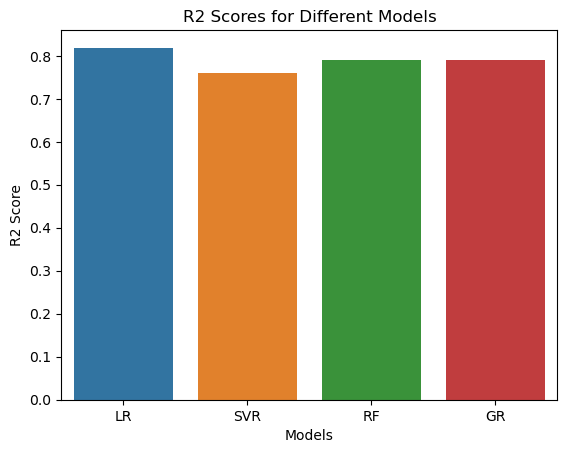

In [185]:
sns.barplot(x='Models', y='R2_Score', data=final_data)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Different Models')
plt.show()

# In Classification

In [192]:
y_train = [1 if value>0.8 else 0 for value in y_train]
y_test = [1 if value>0.8 else 0 for value in y_test]


y_train = np.array(y_train)
y_test = np.array(y_test)

In [193]:
y_train


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

# Import the models

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Models
###### LogisticRegression

In [210]:
# Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
# predict
y_pred1 = lr.predict(X_test)
# Evaluation
print("Accuracy Score : ",accuracy_score(y_test,y_pred1))

Accuracy Score :  0.92


###### Support vector Machine(SVM)

In [211]:
# Model
svm = SVC()
svm.fit(X_train, y_train)
# predict
y_pred2 = svm.predict(X_test)
# Evaluation
print("Accuracy Score : ",accuracy_score(y_test,y_pred2))

Accuracy Score :  0.73


###### KNeighbors

In [212]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test,y_pred3))

Accuracy Score :  0.94


###### Random Forest

In [213]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
# predict
y_pred4 = rf.predict(X_test)
# Evaluation
print("Accuracy Score : ",accuracy_score(y_test,y_pred4))

Accuracy Score :  0.96


###### GradientBoost

In [214]:
gc=GradientBoostingClassifier()
gc.fit(X_train, y_train)
# predict
y_pred5 = gc.predict(X_test)
# Evaluation
print("Accuracy Score : ",accuracy_score(y_test,y_pred5))

Accuracy Score :  0.97


In [215]:
final_data = pd.DataFrame({"Models":["LR","SVM","KNN","RF","GB"],
                          "R2_Score":[accuracy_score(y_test,y_pred1),
                                      accuracy_score(y_test,y_pred2),
                                     accuracy_score(y_test,y_pred3),
                                     accuracy_score(y_test,y_pred4),
                                     accuracy_score(y_test,y_pred5)]})

In [216]:
final_data

,Models,R2_Score
0,LR,0.92
1,SVM,0.73
2,KNN,0.94
3,RF,0.96
4,GB,0.97


# Ploting the Data

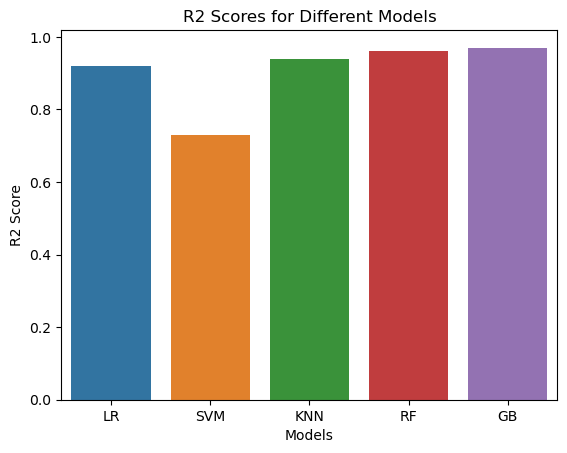

In [217]:
sns.barplot(x='Models', y='R2_Score', data=final_data)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Different Models')
plt.show()

# Save The Model

### Here in this data set classification technic is best

In [218]:
df.columns

Index(['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance of Admit'],
      dtype='object')

In [221]:
X = df.drop("Chance of Admit",axis = 1)
y = df["Chance of Admit"]

In [222]:
y = [1 if value>0.8 else 0 for value in y]

In [223]:
y = np.array(y)

In [224]:
# Feature scaling for X
X = sc.fit_transform(X)

In [225]:
gc=GradientBoostingClassifier()
gc.fit(X,y)

GradientBoostingClassifier()

In [226]:
import joblib

In [227]:
joblib.dump(gc,"admission_model")

['admission_model']

In [228]:
model = joblib.load("admission_model")

In [229]:
df.columns

Index(['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance of Admit'],
      dtype='object')

#### Predicting the value using trained model

In [233]:
print(model.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]])))


[1]
